In [1]:
%matplotlib inline
import numpy as np                                
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns


In [2]:
import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [3]:
from keras.layers import Dense, Dropout
from keras.preprocessing import sequence
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

In [4]:
def split_df_to_x_y(df, target, specify_features=None):
    """

    :param df:
    :param target: str, target name
    :param specify_features: list of features name
    :return:
    """
    if specify_features is None:
        features = [feat for feat in df.columns if feat != target]
    else:
        features = specify_features
    x = df[features]
    y = df[target]
    return x, y

In [5]:
train = pd.read_csv('out/train.csv', index_col = 0)
test = pd.read_csv('out/test.csv', index_col = 0)


X_train, y_train = split_df_to_x_y(train, target='TemplateID', specify_features=None)
X_test, y_test = split_df_to_x_y(test, target='TemplateID', specify_features=None)

In [6]:
n_cols = X_train.shape[1]
# The input shape to use in the first hidden layer
input_shape = (n_cols,)

In [7]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_train = to_categorical(encoded_Y)
print(dummy_y_train.shape)
encoded_Y_test = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_test = to_categorical(encoded_Y_test)
print(dummy_y_test.shape)

(125951, 23)
(53776, 23)


In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)


# create the model
lrs = [ 0.001]
for lr in lrs:
    model = Sequential()
    #e = Embedding(data_size, 300, weights=[embedding_matrix], input_length=max_words, trainable=False)
    #model.add(e)
    #model.add(Flatten())
    model.add(Dense(70, input_shape = input_shape , activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(70, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(23, activation='sigmoid'))
    model.summary()
    
    opt = Adam(lr = lr)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # Fit the model
    model_trained = model.fit(X_train, dummy_y_train, validation_split=0.3 , epochs=30, #validation_data=(X_test,dummy_y_test)
                              batch_size = 32, verbose=1, callbacks=[early_stopping_monitor])
    # Final evaluation of the model
    scores = model.evaluate(X_test, dummy_y_test, verbose=0)
    print("Accuracy: %.3f" % (scores[1]*100))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 70)                21630     
_________________________________________________________________
dropout_1 (Dropout)          (None, 70)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 70)                4970      
_________________________________________________________________
dropout_2 (Dropout)          (None, 70)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                3550      
_________________________________________________________________
dropout_3 (Dropout)  

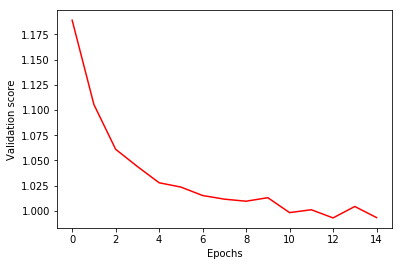

In [11]:
# Create the plot
plt.plot(model_trained.history['val_loss'], 'r')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

In [12]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict_classes(X_test)
cm = confusion_matrix (encoded_Y_test, y_pred)

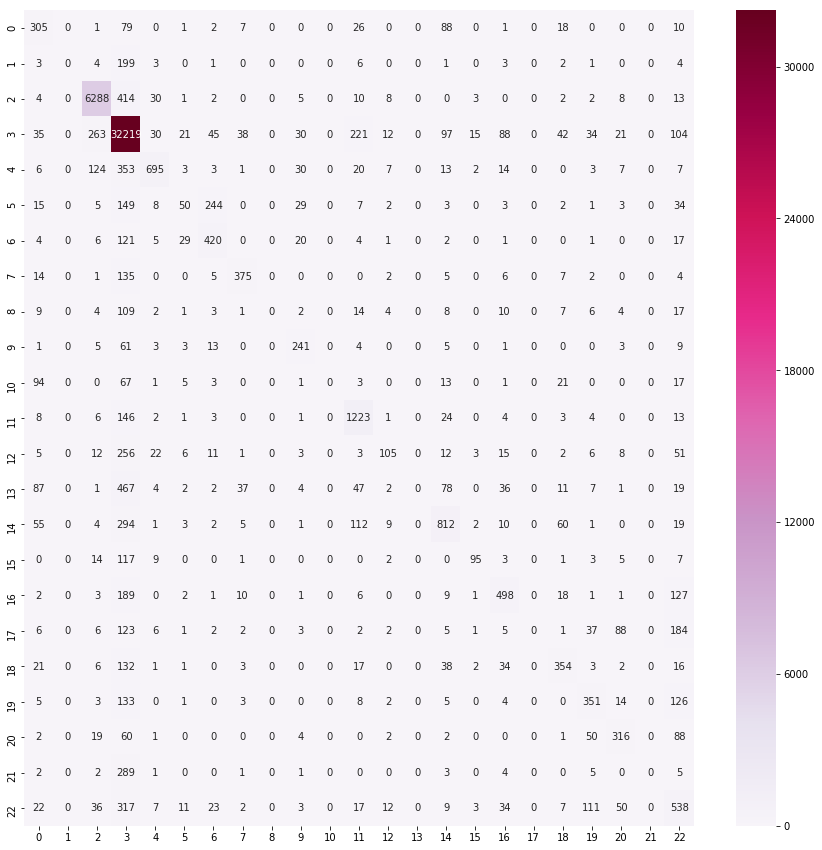

In [13]:
df_cm = pd.DataFrame(cm, index = [i for i in range(len(cm))],
                  columns = [i for i in range(len(cm))])
plt.figure(figsize = (15,15))
sns.heatmap(df_cm, annot=True , fmt = 'd', cmap = 'PuRd')
tick_marks = np.arange(len(cm))
# plt.xticks(tick_marks, clf.classes_, rotation=45)
# plt.yticks(tick_marks, clf.classes_, rotation = 0)
plt.show()

In [14]:
from sklearn.metrics import classification_report 
report = classification_report(encoded_Y_test, y_pred, output_dict= True)
df_report = pd.DataFrame(report).transpose()
df_report

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,f1-score,precision,recall,support
0,0.490748,0.432624,0.566914,538.000000
1,0.000000,0.000000,0.000000,227.000000
2,0.924502,0.922941,0.926068,6790.000000
3,0.923922,0.884433,0.967102,33315.000000
4,0.655970,0.836342,0.539596,1288.000000
5,0.143472,0.352113,0.090090,555.000000
6,0.593220,0.535032,0.665610,631.000000
7,0.719080,0.770021,0.674460,556.000000
8,0.000000,0.000000,0.000000,201.000000
9,0.662088,0.635884,0.690544,349.000000


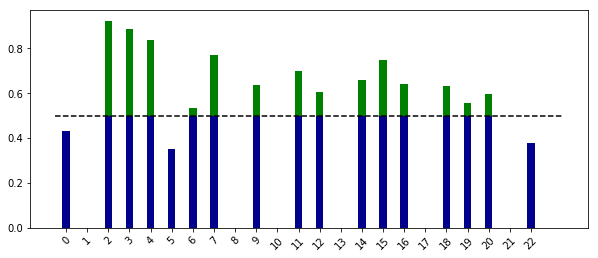

In [16]:
values = df_report['precision'][:-3]
x = range(len(values))
threshold =0.5
above_threshold = np.maximum(values - threshold, 0)
below_threshold = np.minimum(values, threshold)

# and plot it
#fig, ax = plt.subplots()
plt.figure(figsize = (10, 4))
plt.bar(x, below_threshold, 0.35, color="darkblue")
plt.bar(x, above_threshold, 0.35, color="green",
        bottom=below_threshold)

# horizontal line indicating the threshold
plt.plot([-.5, 23.5], [threshold, threshold], "k--")
# plt.figure(figsize = (10, 4))
# #rf_report['f1-score'][:-3].plot(kind = 'bar')
# rf_report['precision'][:-3].plot(kind = 'bar', color = 'darkblue')
plt.xticks(ticks= np.arange(len(df_report.index[:-3])) ,labels = df_report.index[:-3], rotation=45)
# plt.plot([0.5,0.5])
plt.show()